# OBJECTIVE

The project aims to create a hotel recommendation system that leverages AI to analyse customer feedback and travel data. The goal is to develop a scoreboard that evaluates hotel based on at least five specific features using this core card the system will then recommend top 5 hotels that best meet the criteria of a particular customer segment

# ABOUT THE DATASET

The data set is the "515K Hotel Reviews Data in Europe" obtained from Kraggle ("https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe") the dataset is a csv file containing texts. The positive and negative reviews are already provided, and the all the reviews are in Englis. The datas in this dataset was collected from booking.com from 2015 to 2017.
The data set contains 515738 reviews for 1492 luxury hotels in Europe and includes 17 parameters.

In [119]:
#import required libraires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [120]:
# importing data
df= pd.read_csv('Hotel_Reviews.csv')
df


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [121]:
df.shape

(515738, 17)

In [122]:
# changing column to lower case
df.columns=[x.lower() for x in df.columns]

In [123]:
df.columns #column list and names of columns

Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [124]:
#information about the columns in another DataFrame called df.

analys = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
    
})
display(analys)

,Unique,Null,NullPercent,Type
hotel_address,1493,0,0.000000,object
additional_number_of_scoring,480,0,0.000000,int64
review_date,731,0,0.000000,object
average_score,34,0,0.000000,float64
hotel_name,1492,0,0.000000,object
reviewer_nationality,227,0,0.000000,object
negative_review,330011,0,0.000000,object
review_total_negative_word_counts,402,0,0.000000,int64
total_number_of_reviews,1142,0,0.000000,int64
positive_review,412601,0,0.000000,object


In [125]:
# Define columns to drop, but first check if they exist
columns_to_drop = [
    'reviewer_nationality', 
    'review_total_negative_word_counts', 
    'review_total_positive_word_counts', 
    'total_number_of_reviews_reviewer_has_given',  
    'days_since_review', 
    'additional_number_of_scoring'
]

# Remove columns that are not present in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop columns, ignoring errors for missing columns
df = df.drop(columns=columns_to_drop, errors='ignore')

# Print remaining columns to confirm removal
print("Remaining columns after drop:", df.columns)


Remaining columns after drop: Index(['hotel_address', 'review_date', 'average_score', 'hotel_name',
       'negative_review', 'total_number_of_reviews', 'positive_review',
       'reviewer_score', 'tags', 'lat', 'lng'],
      dtype='object')


In [126]:
#new column order
new_column_order = [
    'hotel_name', 
    'hotel_address', 
    'average_score', 
    'total_number_of_reviews', 
    'positive_review', 
    'negative_review', 
    'reviewer_score',
    'tags',
    'lat',
    'lng'
]
# Reorder the DataFrame columns
df = df[new_column_order]
df.columns

Index(['hotel_name', 'hotel_address', 'average_score',
       'total_number_of_reviews', 'positive_review', 'negative_review',
       'reviewer_score', 'tags', 'lat', 'lng'],
      dtype='object')

In [127]:
df.head()

,hotel_name,hotel_address,average_score,total_number_of_reviews,positive_review,negative_review,reviewer_score,tags,lat,lng
0,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,1403,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968
1,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,1403,No real complaints the hotel was great great ...,No Negative,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968
2,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,1403,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.1,"[' Leisure trip ', ' Family with young childre...",52.360576,4.915968
3,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,1403,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",52.360576,4.915968
4,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,1403,Amazing location and building Romantic setting,You When I booked with your company on line y...,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",52.360576,4.915968


In [128]:
print(df.dtypes)

hotel_name                  object
hotel_address               object
average_score              float64
total_number_of_reviews      int64
positive_review             object
negative_review             object
reviewer_score             float64
tags                        object
lat                        float64
lng                        float64
dtype: object


Object Data-type is used for Textual Data as text data, which should be stored as object in pandas.<br>
average score is saved as float for its decimal points <br>
total no of reviews is saved as integer for count data <br>
**The data types are appropriate for the respective columns and require no further conversion.**

In [129]:
df.duplicated().sum() #Duplicate Value Count

579

In [130]:
df1 = df.drop_duplicates()
df1.duplicated().sum() 

0

In [131]:
df1.shape

(515159, 10)

In [132]:
df1 = df1.isnull().sum()
print(df1)

hotel_name                    0
hotel_address                 0
average_score                 0
total_number_of_reviews       0
positive_review               0
negative_review               0
reviewer_score                0
tags                          0
lat                        3268
lng                        3268
dtype: int64


In [133]:
df1 = df.dropna(how='any', axis=0) 
print(df1.isnull().sum())

hotel_name                 0
hotel_address              0
average_score              0
total_number_of_reviews    0
positive_review            0
negative_review            0
reviewer_score             0
tags                       0
lat                        0
lng                        0
dtype: int64


In [134]:
df1.shape

(512470, 10)

This indicates that there are no missing values (Null) in any of the columns listed. Each column has a count of 0, meaning there are no entries with missing data in those columns.

The duplicated items along with missing values are removed making the data set **(515738 -3268= 512470)** along with reduced columns **(from 17 to 9)**

In [135]:
df1.to_csv('Updated_Hotel_Reviews.csv', index=False)

### Sampling 500 Reviews for Each Hotel

In [136]:
df2 = df.groupby('hotel_name').head(500).reset_index(drop=True)

In [137]:
df2.shape

(363622, 10)

In [138]:
df2.to_csv('Updated_Hotel_Reviews.csv', index=False)

### Understanding the Data - Sets
**df**: Contains the original data set uploaded from Kragle <br>
**df1**: Contains dataset after removal of duplicate values and missing values <br>
**df2**: Contains sample data set of hotels containing only 500 reviews <br>

total of **152116** data entries has been cleaned which included all the missing datas and duplicate values


## Analysing attributes

Analyisng and cleaning the data set based on its attributes (tags)

In [139]:
df3=df2[['hotel_name','tags','lat','lng']]
df3.head()

,hotel_name,tags,lat,lng
0,Hotel Arena,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968
1,Hotel Arena,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968
2,Hotel Arena,"[' Leisure trip ', ' Family with young childre...",52.360576,4.915968
3,Hotel Arena,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",52.360576,4.915968
4,Hotel Arena,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",52.360576,4.915968


In [140]:
df3= df3.groupby('hotel_name').agg({'tags': ', '.join,'lat':'first','lng':'first'}).reset_index()
df3.shape

(1492, 4)

In [141]:
df3.isnull().sum()

hotel_name     0
tags           0
lat           17
lng           17
dtype: int64

In [142]:
df3.head()

,hotel_name,tags,lat,lng
0,11 Cadogan Gardens,"[' Leisure trip ', ' Couple ', ' Superior Quee...",51.493616,-0.159235
1,1K Hotel,"[' Leisure trip ', ' Couple ', ' Superior M Do...",48.863932,2.365874
2,25hours Hotel beim MuseumsQuartier,"[' Leisure trip ', ' Solo traveler ', ' Standa...",48.206474,16.354630
3,41,"[' Leisure trip ', ' Couple ', ' Executive Kin...",51.498147,-0.143649
4,45 Park Lane Dorchester Collection,"[' Leisure trip ', ' Solo traveler ', ' Execut...",51.506371,-0.151536


In [143]:
df3.dropna(subset=['lat','lng'],inplace=True)

In [144]:
df3.shape

(1475, 4)

## Visualization before training 

### Countplot :used to show the frequency or count of each category in a categorical variable

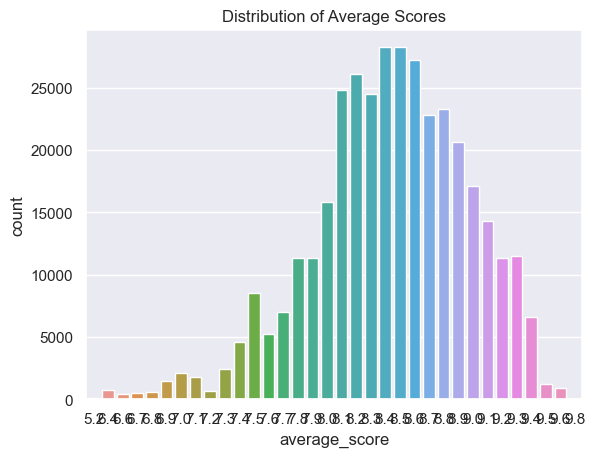

In [152]:
sns.set(style='darkgrid')
sns.countplot(x='average_score', data=df2)
plt.title('Distribution of Average Scores')
plt.show()

The resulting chart is a count plot that displays the distribution of average scores.<br> The x-axis represents the average scores, and the y-axis represents the count of each score.<br>

##### Key Features:
The count plot shows the frequency of each average score, giving an idea of how the scores are distributed.<br>

The chart can help identify the most common average scores, as well as any outliers or anomalies in the data.<br>


## distribution of average scores

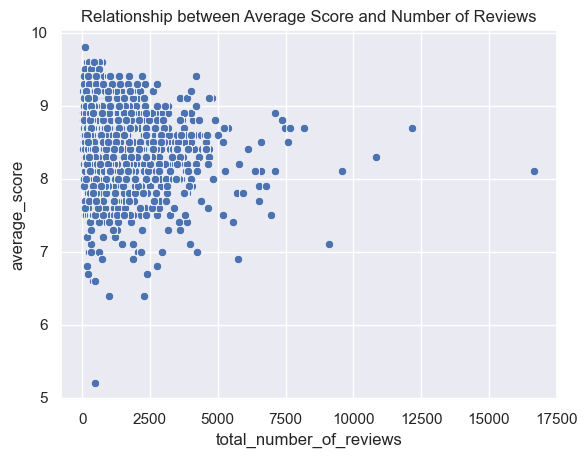

In [159]:
sns.scatterplot(x='total_number_of_reviews', y='average_score', data=df2)
plt.title('Relationship between Average Score and Number of Reviews')
plt.show()

## pairplot to show the relationships between all the variables in the dataset:

C:\Users\DEEPASREE DAS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


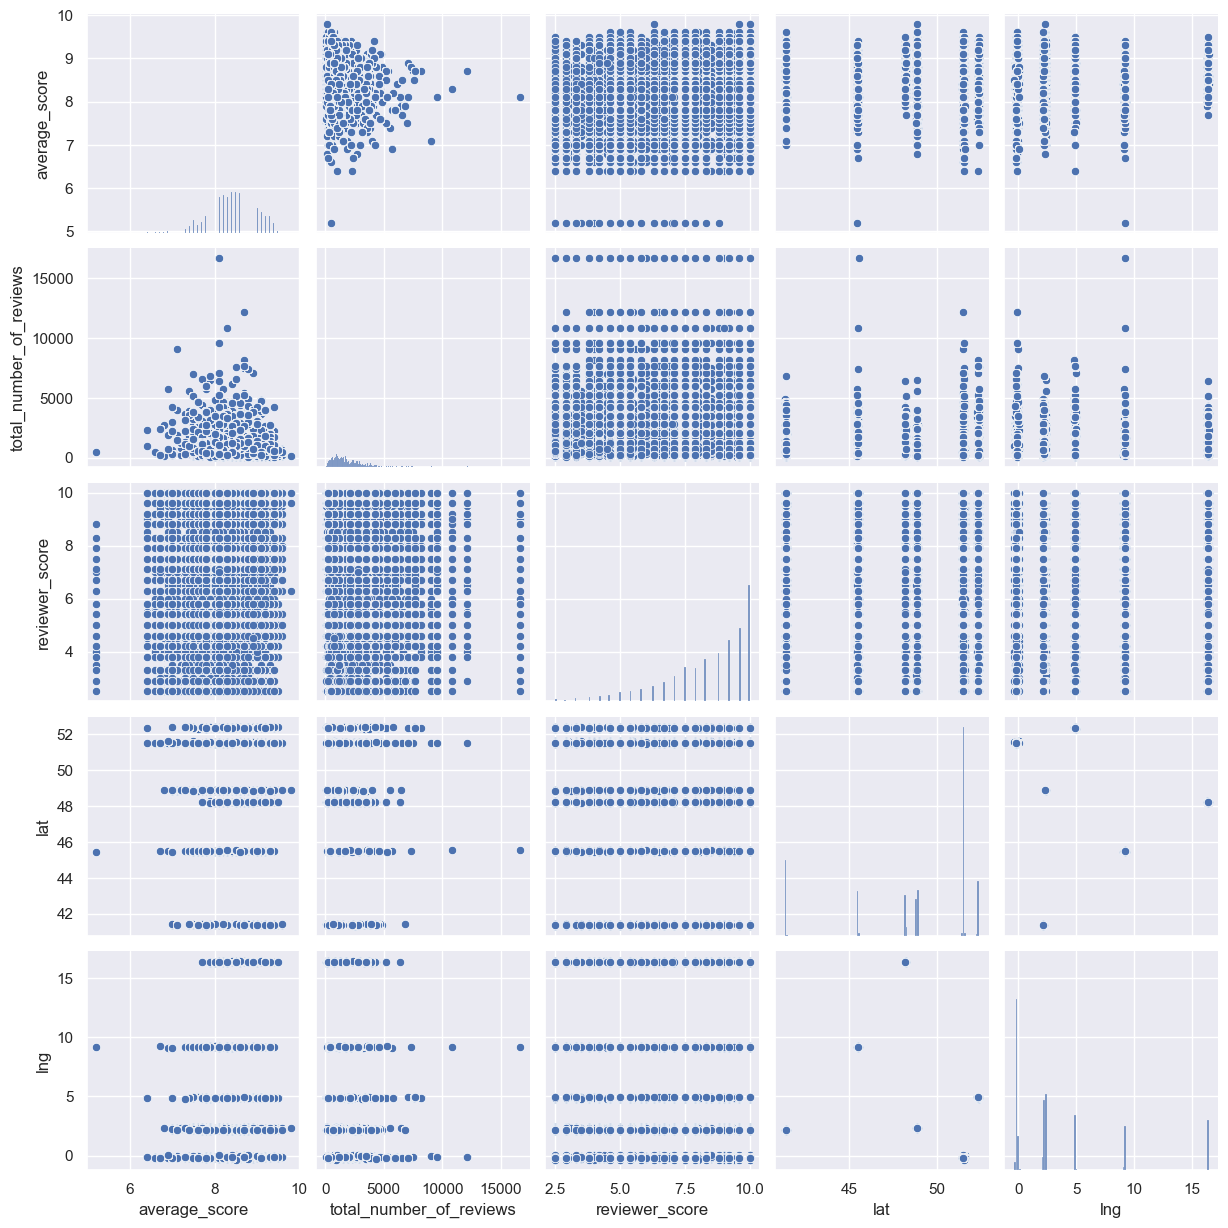

In [161]:
sns.pairplot(df2)
plt.show()